# MVP Sprint: Engenharia de Dados

## Objetivo


###O Objetivo é ter a resposta de:   
1 - Qual o Preço médio dos últimos 6 meses do produtos hortifruti nos Principais Estados do Brasil  
2 - Qual o valor médio dos produtos hortifruti mês a mês no ano de 2024   
3 - Qual o Estado com os maiores custos de produtos unitários de hortifruti do brasil  
4 - Qual a variação mês a mês dos produtos de hortifruti no ano de 2024  
5 - Qual Ceasa com o maior Preço médio dos últimos 6 meses da Maça no brasil  
6 - Qual o item com maior variação em junho de 2024  
7 - Qual a correlação do Dolar nos custos dos produtos de hortifrut  
8 - Qual insumo foi mais impactado com as movimentações do dolar 


## Coleta dos Dados

Fiz algumas pesquisas para encontrar o melhor lugar para extrarir os dados que precisava.  
1- ***Agro Link*** - Busquei no site Agro Link, me pareceu bem completo mas não dava a opção de exportar a base com as informações que consultava no site.  
2- ***HF brasil*** - Verifiquei o Site do HF brasil (Hortifruti Brasil), eu tinha a opção de extração da Base, mas não tinham muitos tipos diferentes de Produtos e a extração era muito manual(Só conseguia extrair um Produto de cada vez).  
3- ***CEPEA*** - Achei o Site CEPEA, onde encontrei uma área voltada para consulta ao banco de dados do site, mas não tinham muitas informações por estado e extração bem manual(Só conseguia extrair um indicador de cada produto e Região por extração)  
4- ***CONAB*** - Na ultima pesquisa encontrei o site do CONAB(Companhia nacional de abastecimento), onde eles tem um projeto chamado PROHORT(Programa Brasileiro de Modernização do Mercado Hortigranjeiro) e entre suas principais ferramentas, eles possuem sistemas de informações, que trazem dados da comercialização de produtos hortigranjeiros nas principais Centrais de Abastecimento (Ceasas) do país. Eles possuem O B.I.(Plataforma saiku) do Mercado Atacadista de Hortigranjeiros é uma ferramenta de consulta às informações da média simples* das cotações diárias realizadas pelos mercados atacadistas, dentro do período selecionado pelo usuário. São disponibilizados os preços diários para 48 produtos, cujos lançamentos são efetuados pelas Centrais de Abastecimento. A coleta ocorre, geralmente, nos dias mais fortes de comercialização, enquanto os entrepostos de maior porte, atualizam as cotações diariamente.
(* somatório dos preços lançados dividido pelo número de dias no período considerado)

### Fontes Consultadas  
  
 
#####FONTE ESCOLHIDA - CONAB = https://www.conab.gov.br/info-agro/hortigranjeiros-prohort  
##### Notícia sobre a CONAB no GOV = https://www.gov.br/agricultura/pt-br/assuntos/noticias/conab-lanca-aplicativo-com-precos-diarios-de-frutas-e-verduras-nas-ceasas-do-pais  

Agro Link = https://www.agrolink.com.br/   
HF BRASIL = https://www.hfbrasil.org.br/br/banco-de-dados-precos-medios-dos-hortifruticolas.aspx?produto=1&regiao%5B%5D=89&regiao%5B%5D=3&regiao%5B%5D=4&regiao%5B%5D=7&regiao%5B%5D=59&regiao%5B%5D=13&regiao%5B%5D=17&regiao%5B%5D=18&regiao%5B%5D=30&regiao%5B%5D=35&regiao%5B%5D=40&regiao%5B%5D=41&regiao%5B%5D=44&regiao%5B%5D=47&regiao%5B%5D=54&todos_regiao=1&periodicidade=diario&ano_inicial=2024&ano_final=2024#  
CEPEA = https://www.cepea.esalq.usp.br/br/indicador/acucar.aspx  

Base Dolar = https://br.investing.com/currencies/usd-brl-historical-data

## Armazenamento na nuvem dos dados coletados

In [0]:
# Colocar imagem dos dados coletados e armazenados

## Modelagem


### Para essa Modelagem utilizo a Arquitetura Medalhão

### CAMADA BRONZE

#### Criação da Camada Bronze 


In [0]:
#criar catalog Bronze
spark.sql("CREATE CATALOG IF NOT EXISTS Bronze")

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:436)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecution(ChauffeurState.scala:1266)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:983)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:669)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:687)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:426)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:216)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:424)
	at com.databricks.logging.Usag

In [0]:
#criar schema para inserir as tabelas 
spark.sql("CREATE SCHEMA IF NOT EXISTS Bronze.tables")

#### Tratamento Base Bronze 

In [0]:
#instalando biblioteca necessária:
%pip install azure-storage-blob pandas openpyxl
%pip install python-dotenv

In [0]:
# Restart na biblioteca para usar os pacotes atualizados 
dbutils.library.restartPython()

##### Carregamento dos arquivos armazenados no Datalake na pasta bronze para modelagem

In [0]:
#importando as Bibliotecas
from dotenv import load_dotenv
import os
from azure.storage.blob import BlobServiceClient
import pandas as pd
from io import BytesIO

In [0]:
# Definir o caminho do arquivo .env 
env_path = '/Azure.env'

# Carregar as variáveis de ambiente do arquivo .env
load_dotenv(env_path)


True

In [0]:
# Configurar a conexão com o Azure Data Lake
account_name = os.getenv('AZURE_ACCOUNT_NAME')  # Definindo o nome da conta do Azure Data Lake.
account_key = os.getenv('AZURE_ACCOUNT_KEY')  # Definindo a chave de acesso da conta do Azure Data Lake.
container_name = 'brickmvpcontainer'  # Definindo o nome do contêiner no Azure Data Lake.

# Criar um cliente BlobServiceClient
blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)  # Criando um cliente BlobServiceClient para interagir com o serviço de blobs do Azure usando o URL da conta e a chave de acesso.

# Lendo a Base Dimensão Produto
file_path_produto = 'bronze/DIMENSÃO PRODUTO.xlsx'  # Definindo o caminho do arquivo Excel no contêiner.
blob_client = blob_service_client.get_blob_client(container=container_name, blob=file_path_produto)  # Criando um cliente BlobClient para acessar o blob específico (arquivo Excel) no contêiner.
blob_data = blob_client.download_blob().readall()  # Fazendo o download do blob (arquivo Excel) e lendo todos os dados.
df_Produto = pd.read_excel(BytesIO(blob_data))  # Lendo os dados do blob em um DataFrame do pandas usando o pd.read_excel e BytesIO para tratar os dados como um arquivo Excel.

# Exibir os dados lidos
df_Produto.head()

,Produto,Unidade
0,ABACATE,KG
1,ABACAXI,UN
2,ABOBORA,KG
3,ABOBRINHA,KG
4,ALFACE,DZ


In [0]:

#Lendo as Bases fato hortigrangeiros

# Lista dos caminhos dos arquivos dentro do contêiner
file_paths = [
    'bronze/saiku-export Jan24.xlsx',
    'bronze/saiku-export fev24.xlsx',
    'bronze/saiku-export mar24.xlsx',
    'bronze/saiku-export abr24.xlsx',
    'bronze/saiku-export mai24.xlsx',
    'bronze/saiku-export jun24.xlsx'
]

# Função para ler um arquivo Excel do Azure Data Lake
def read_excel_from_datalake(blob_service_client, container_name, file_path):
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=file_path)
    blob_data = blob_client.download_blob().readall()
    df = pd.read_excel(BytesIO(blob_data))
    return df
# Ler todos os arquivos e armazenar em um dicionário de DataFrames
dfs = {}
for file_path in file_paths:
    # Extrair a parte relevante do nome do arquivo (por exemplo, 'Jan24')
    file_name = file_path.split('/')[-1].split('.')[0]  # 'saiku-export Jan24' -> 'Jan24'
    df_name = file_name.split()[-1]  # Extrai 'Jan24', 'fev24', etc.
    
    # Ler o arquivo e criar um DataFrame
    df = read_excel_from_datalake(blob_service_client, container_name, file_path)
    
    # Armazenar o DataFrame no dicionário com a chave sendo o nome desejado
    dfs[df_name] = df



##### Tratamento na Base para inserção na tabela bronze

In [0]:
# Acessar os DataFrames específicos do dicionário
df_Jan24 = dfs['Jan24']
df_fev24 = dfs['fev24']
df_mar24 = dfs['mar24']
df_abr24 = dfs['abr24']
df_mai24 = dfs['mai24']
df_jun24 = dfs['jun24']


In [0]:
# Exibindo um dos DataFrames extraídos
df_Jan24.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,02-JAN-2024,03-JAN-2024,04-JAN-2024,05-JAN-2024,06-JAN-2024,08-JAN-2024,09-JAN-2024,10-JAN-2024,11-JAN-2024,12-JAN-2024,13-JAN-2024,15-JAN-2024,16-JAN-2024,17-JAN-2024,18-JAN-2024,19-JAN-2024,20-JAN-2024,22-JAN-2024,23-JAN-2024,24-JAN-2024,25-JAN-2024,26-JAN-2024,27-JAN-2024,29-JAN-2024,30-JAN-2024,31-JAN-2024
0,Produto,CEASA,UF CEASA,Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$),Preco Medio (R$)
1,ABACATE,AMA/BA - JUAZEIRO,BA,5.4,5.5,5.5,5.75,NaN,4.75,5,5.15,5.15,4.9,NaN,4.5,4.75,4.75,4.75,4.25,NaN,4.25,NaN,4.75,4.5,4.5,NaN,NaN,4.5,4.5
2,ABACATE,CEAGESP - ARACATUBA,SP,NaN,3.54,NaN,5.67,NaN,5.67,NaN,5.67,NaN,5.37,NaN,5.42,NaN,5.13,NaN,5.03,NaN,5.08,NaN,4.98,NaN,NaN,NaN,5.03,NaN,4.9
3,ABACATE,CEAGESP - ARARAQUARA,SP,NaN,4.09,NaN,4.09,NaN,3.75,NaN,3.75,NaN,3.3,NaN,3.3,NaN,2.73,NaN,2.73,NaN,2.84,NaN,2.27,NaN,2.05,NaN,2.39,NaN,2.27
4,ABACATE,CEAGESP - BAURU,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.86,NaN,NaN,2.95,NaN,NaN,NaN,NaN,NaN,2.95,NaN,NaN,3.41,NaN


In [0]:
# Renomear as colunas para facilitar a manipulação
df_Jan24.columns = ['Produto', 'Fornecedor', 'UF'] + df_Jan24.columns[3:].tolist()
df_fev24.columns = ['Produto', 'Fornecedor', 'UF'] + df_fev24.columns[3:].tolist()
df_mar24.columns = ['Produto', 'Fornecedor', 'UF'] + df_mar24.columns[3:].tolist()
df_abr24.columns = ['Produto', 'Fornecedor', 'UF'] + df_abr24.columns[3:].tolist()
df_mai24.columns = ['Produto', 'Fornecedor', 'UF'] + df_mai24.columns[3:].tolist()
df_jun24.columns = ['Produto', 'Fornecedor', 'UF'] + df_jun24.columns[3:].tolist()

In [0]:
# Remover a primeira linha de cabeçalho adicional
df_Jan24 = df_Jan24[1:]
df_fev24 = df_fev24[1:]
df_mar24 = df_mar24[1:]
df_abr24 = df_abr24[1:]
df_mai24 = df_mai24[1:]
df_jun24 = df_jun24[1:]

In [0]:
# Criando uma função que usa a função melt para transformar os dados em cada df(Derreter as colunas para a Tabela ficar em um formato longo e estreito)
def reshape_dataframe(df):
    df_melted = df.melt(id_vars=['Produto', 'Fornecedor', 'UF'], var_name='Data', value_name='Preco_Medio')
    return df_melted

In [0]:
# Usando a funcão criada 
df_Jan24_melted = reshape_dataframe(df_Jan24)
df_fev24_melted = reshape_dataframe(df_fev24)
df_mar24_melted = reshape_dataframe(df_mar24)
df_abr24_melted = reshape_dataframe(df_abr24)
df_mai24_melted = reshape_dataframe(df_mai24)
df_jun24_melted = reshape_dataframe(df_jun24)

In [0]:
df_fev24_melted.dtypes

Produto        object
Fornecedor     object
UF             object
Data           object
Preco_Medio    object
dtype: object

In [0]:
# Combinar os DataFrames
df = pd.concat([df_Jan24_melted, df_fev24_melted, df_mar24_melted, df_abr24_melted, df_mai24_melted, df_jun24_melted])

In [0]:
df.head()

,Produto,Fornecedor,UF,Data,Preco_Medio
0,ABACATE,AMA/BA - JUAZEIRO,BA,02-JAN-2024,5.4
1,ABACATE,CEAGESP - ARACATUBA,SP,02-JAN-2024,NaN
2,ABACATE,CEAGESP - ARARAQUARA,SP,02-JAN-2024,NaN
3,ABACATE,CEAGESP - BAURU,SP,02-JAN-2024,NaN
4,ABACATE,CEAGESP - FRANCA,SP,02-JAN-2024,NaN


#### Salvando arquivo Bronze no Data Lake

##### Para salvar um arquivo no Azure Data Lake como um Delta Table usando Spark, é necessário converter o DataFrame pandas em um DataFrame Spark.  
##### Isso ocorre porque as operações de leitura e escrita no Azure Data Lake são realizadas utilizando a API do Spark.

In [0]:
# Importando SparkSession
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName("Salvar_Bonze_parquet").getOrCreate()

In [0]:
# Converter o DataFrame pandas (Fato_hortigrangeiros) para um DataFrame Spark:
df_spark = spark.createDataFrame(df.astype(str))

In [0]:
# Converter o DataFrame pandas (Dimensão_Produto) para um DataFrame Spark:
df_spark_produto = spark.createDataFrame(df_Produto.astype(str))

In [0]:
df_spark_produto.show(10)

+-------------+-------+
|      Produto|Unidade|
+-------------+-------+
|      ABACATE|     KG|
|      ABACAXI|     UN|
|      ABOBORA|     KG|
|    ABOBRINHA|     KG|
|       ALFACE|     DZ|
|         ALHO|     KG|
|BANANA NANICA|     KG|
| BANANA PRATA|     KG|
|       BATATA|     KG|
|  BATATA DOCE|     KG|
+-------------+-------+
only showing top 10 rows



In [0]:
df_spark.show(10)

+-------+--------------------+---+-----------+-----------+
|Produto|          Fornecedor| UF|       Data|Preco_Medio|
+-------+--------------------+---+-----------+-----------+
|ABACATE|   AMA/BA - JUAZEIRO| BA|02-JAN-2024|        5.4|
|ABACATE| CEAGESP - ARACATUBA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - ARARAQUARA| SP|02-JAN-2024|        nan|
|ABACATE|     CEAGESP - BAURU| SP|02-JAN-2024|        nan|
|ABACATE|    CEAGESP - FRANCA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PIRACICABA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PRES. P...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - S J DOS...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - SAO JOS...| SP|02-JAN-2024|        nan|
|ABACATE| CEAGESP - SAO PAULO| SP|02-JAN-2024|        nan|
+-------+--------------------+---+-----------+-----------+
only showing top 10 rows



In [0]:
# Configurar a chave de acesso à conta do Azure Data Lake Storage
spark.conf.set(
    f"fs.azure.account.key.{account_name}.dfs.core.windows.net",
    account_key
)

In [0]:
#Salvando Fato_hortigrangeiros na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/bronze/output_hortigrangeiros_delta"

df_spark.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

In [0]:

# Salvando dimensao produto na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/bronze/output_produto_delta"

# Salvando os dados em formato Delta
df_spark_produto.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

#### Criação da tabela bronze

In [0]:
%sql
-- Criar a tabela dimensao_produto com a chave primária
CREATE TABLE IF NOT EXISTS Bronze.tables.dimensao_produto (				
  Produto STRING PRIMARY KEY,
  Unidade STRING
);

In [0]:
%sql
-- Criando a tabela Fato_hortigrangeiros_Bronze com algumas restrições de integridade como a chave estrangeira referenciando a chave primária de dimensao_produto
CREATE TABLE IF NOT EXISTS Bronze.tables.Fato_hortigrangeiros (				
  Produto STRING,
  Fornecedor STRING,
  UF STRING,
  Data STRING,
  Preco_Medio STRING,
  FOREIGN KEY (Produto) REFERENCES Bronze.tables.dimensao_produto(Produto)
);

In [0]:
#%sql
#DROP TABLE IF EXISTS Bronze.tables.dimensao_produto_2

#### Inserindo dados na tabela bronze

In [0]:
#Lendo a tabela Fato_hortigrangeiros salva anteriomente no Datalake

spark.conf.set(
    f"fs.azure.account.key.{account_name}.dfs.core.windows.net",
    account_key
)

df_bronze_hortigrangeiros = spark.read.format('delta').option("header",True).option('inferschema',True).load(f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/bronze/output_hortigrangeiros_delta")

df_bronze_hortigrangeiros.show(10)

+-------+--------------------+---+-----------+-----------+
|Produto|          Fornecedor| UF|       Data|Preco_Medio|
+-------+--------------------+---+-----------+-----------+
|ABACATE|   AMA/BA - JUAZEIRO| BA|02-JAN-2024|        5.4|
|ABACATE| CEAGESP - ARACATUBA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - ARARAQUARA| SP|02-JAN-2024|        nan|
|ABACATE|     CEAGESP - BAURU| SP|02-JAN-2024|        nan|
|ABACATE|    CEAGESP - FRANCA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PIRACICABA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PRES. P...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - S J DOS...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - SAO JOS...| SP|02-JAN-2024|        nan|
|ABACATE| CEAGESP - SAO PAULO| SP|02-JAN-2024|        nan|
+-------+--------------------+---+-----------+-----------+
only showing top 10 rows



In [0]:
# Salvando arquivo na tabela Fato_hortigrangeiros
df_bronze_hortigrangeiros.write.mode("overwrite").format("delta").saveAsTable("Bronze.tables.Fato_hortigrangeiros")

In [0]:
#Lendo a tabela dimensão produto salva anteriomente no Datalake

# Configurando a conta do Azure Data Lake Storage
spark.conf.set(
    f"fs.azure.account.key.{account_name}.dfs.core.windows.net",
    account_key
)


df_bronze_hortigrangeiros_produto = spark.read.format('delta').load(f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/bronze/output_produto_delta")
df_bronze_hortigrangeiros_produto.show(10)

+-------------+-------+
|      Produto|Unidade|
+-------------+-------+
|      ABACATE|     KG|
|      ABACAXI|     UN|
|      ABOBORA|     KG|
|    ABOBRINHA|     KG|
|       ALFACE|     DZ|
|         ALHO|     KG|
|BANANA NANICA|     KG|
| BANANA PRATA|     KG|
|       BATATA|     KG|
|  BATATA DOCE|     KG|
+-------------+-------+
only showing top 10 rows



In [0]:
# Salvando arquivo na tabela dimensao_produto
df_bronze_hortigrangeiros_produto.write.mode("overwrite").format("delta").saveAsTable("Bronze.tables.dimensao_produto")

##### Algumas consultas de teste das tabelas

In [0]:
spark.sql("""
SELECT *
FROM Bronze.tables.dimensao_produto
""").show(10)

+-------------+-------+
|      Produto|Unidade|
+-------------+-------+
|      ABACATE|     KG|
|      ABACAXI|     UN|
|      ABOBORA|     KG|
|    ABOBRINHA|     KG|
|       ALFACE|     DZ|
|         ALHO|     KG|
|BANANA NANICA|     KG|
| BANANA PRATA|     KG|
|       BATATA|     KG|
|  BATATA DOCE|     KG|
+-------------+-------+
only showing top 10 rows



In [0]:
spark.sql("""
SELECT *
FROM Bronze.tables.Fato_hortigrangeiros
""").show(10)

+-------+--------------------+---+-----------+-----------+
|Produto|          Fornecedor| UF|       Data|Preco_Medio|
+-------+--------------------+---+-----------+-----------+
|ABACATE|   AMA/BA - JUAZEIRO| BA|02-JAN-2024|        5.4|
|ABACATE| CEAGESP - ARACATUBA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - ARARAQUARA| SP|02-JAN-2024|        nan|
|ABACATE|     CEAGESP - BAURU| SP|02-JAN-2024|        nan|
|ABACATE|    CEAGESP - FRANCA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PIRACICABA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PRES. P...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - S J DOS...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - SAO JOS...| SP|02-JAN-2024|        nan|
|ABACATE| CEAGESP - SAO PAULO| SP|02-JAN-2024|        nan|
+-------+--------------------+---+-----------+-----------+
only showing top 10 rows



In [0]:
spark.sql("""
SELECT f.*,
    D.Unidade 
FROM Bronze.tables.Fato_hortigrangeiros as F 
LEFT JOIN Bronze.tables.dimensao_produto as D ON F.Produto = D.Produto
""").show(10)

+-------+--------------------+---+-----------+-----------+-------+
|Produto|          Fornecedor| UF|       Data|Preco_Medio|Unidade|
+-------+--------------------+---+-----------+-----------+-------+
|ABACATE|   AMA/BA - JUAZEIRO| BA|02-JAN-2024|        5.4|     KG|
|ABACATE| CEAGESP - ARACATUBA| SP|02-JAN-2024|        nan|     KG|
|ABACATE|CEAGESP - ARARAQUARA| SP|02-JAN-2024|        nan|     KG|
|ABACATE|     CEAGESP - BAURU| SP|02-JAN-2024|        nan|     KG|
|ABACATE|    CEAGESP - FRANCA| SP|02-JAN-2024|        nan|     KG|
|ABACATE|CEAGESP - PIRACICABA| SP|02-JAN-2024|        nan|     KG|
|ABACATE|CEAGESP - PRES. P...| SP|02-JAN-2024|        nan|     KG|
|ABACATE|CEAGESP - S J DOS...| SP|02-JAN-2024|        nan|     KG|
|ABACATE|CEAGESP - SAO JOS...| SP|02-JAN-2024|        nan|     KG|
|ABACATE| CEAGESP - SAO PAULO| SP|02-JAN-2024|        nan|     KG|
+-------+--------------------+---+-----------+-----------+-------+
only showing top 10 rows



####Catálogo de Dados (CAMADA BRONZE)

##### Tabela Bronze: Fato_hortigrangeiros

| Coluna        | Descrição                                 | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------------------------------- | ------ |---------|-------------|----------------------------------------------- |
| Produto       | Nome do produto (FK para dimensao_produto)| string | 279.283 | 0           |Nome do Produto de Hortifruti Chave estrangeira referenciando dimensao_produto pelo nome |
| Fornecedor    | Nome do fornecedor                        | string | 279.283 | 0           |Nome do Ceasa que pratica aquele preço                     |
| UF            | Unidade Federativa do fornecedor          | string | 279.283 | 0           |Estado (UF) do fornecedor (ex: SP, RJ)                     |
| Data          | Data do Preço Preço do produto            | string | 279.283 | 0           |Data no formato string / Data do preço praticado no dia |
| Preco_Medio   | Preço médio do produto                    | string | 279.283 |163.699      |Preço médio em reais (R$), com duas casas decimais/ Preço do Produto praticado pelo Ceasa no Dia / Contém valores Nulos, pois nem todos os dias os Ceasas enviam seus Preços práticados|

##### Tabela Bronze: dimensao_produto

| Coluna        | Descrição         | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------- | ------ |---------|-------------| ----------------------------------------------- |
| Nome_Produto  | Nome do produto (PK para Fato_hortigrangeiros)   | string | 48 | 0           | Chave Primária referenciando dimensao_produto pelo nome        |
| Unidade       | Unidade de Medida | string | 48 | 0           | Unidade de Medida do Produto (Untilizado para identificar na tabela Fato qual unidade de medida o Preço está se referenciando)    |


#### Exemplo de Dados

##### Tabela Bronze: Fato_hortigrangeiros

| Produto     | Fornecedor  | UF  | Data       | Preco_Medio |
| ----------- | ----------- | --- | ---------- | ----------- |
| Produto A   | Fornecedor A | SP  | 2024-07-01 | 10.00       |
| Produto B   | Fornecedor B | RJ  | 2024-07-02 | 20.00       |
| Produto C   | Fornecedor C | MG  | 2024-07-03 | 30.00       |
| Produto D   | Fornecedor D | ES  | 2024-07-04 | 40.00       |

##### Tabela Bronze: dimensao_produto

| Produto | Unidade |
| ------------ | --------- |
| Produto A    | KG
| Produto B    | DZ
| Produto C    | UND
| Produto D    | KG

### CAMADA SILVER

#### Criação da camada Silver

In [0]:
#criar catalog Silver
spark.sql("CREATE CATALOG IF NOT EXISTS Silver")

DataFrame[]

In [0]:
#criar schema para inserir as tabelas 
spark.sql("CREATE SCHEMA IF NOT EXISTS Silver.tables")

DataFrame[]

#### Tratamento Base Silver

In [0]:
# Importando bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.types import DateType
from pyspark.sql.functions import col, isnan
from pyspark.sql.functions import to_date, date_format
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [0]:
# Criando df_silver_hortigrangeiros a partir do bronze
df_silver_hortigrangeiros = df_bronze_hortigrangeiros

In [0]:
# Criando df_silver_produto a partir do bronze
df_silver_hortigrangeiros_produto = df_bronze_hortigrangeiros_produto

In [0]:
df_silver_hortigrangeiros.show(10)

+-------+--------------------+---+-----------+-----------+
|Produto|          Fornecedor| UF|       Data|Preco_Medio|
+-------+--------------------+---+-----------+-----------+
|ABACATE|   AMA/BA - JUAZEIRO| BA|02-JAN-2024|        5.4|
|ABACATE| CEAGESP - ARACATUBA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - ARARAQUARA| SP|02-JAN-2024|        nan|
|ABACATE|     CEAGESP - BAURU| SP|02-JAN-2024|        nan|
|ABACATE|    CEAGESP - FRANCA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PIRACICABA| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - PRES. P...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - S J DOS...| SP|02-JAN-2024|        nan|
|ABACATE|CEAGESP - SAO JOS...| SP|02-JAN-2024|        nan|
|ABACATE| CEAGESP - SAO PAULO| SP|02-JAN-2024|        nan|
+-------+--------------------+---+-----------+-----------+
only showing top 10 rows



In [0]:
## Como as datas na base estão em formato texto em português, tenho que ajustar os nomes que não são iguais ao inglês para  converter a coluna em formato data sem perder dados

# Ciarção de Função de mapeamento para converter as abreviações dos meses
def ajustar_mes(data):
    if data is None:
        return None
    mes_map = {
        'FEV': 'FEB',
        'ABR': 'APR',
        'MAI': 'MAY'
    }
    for pt_mes, en_mes in mes_map.items():
        data = data.replace(pt_mes, en_mes)
    return data

# Registrando a função UDF
ajustar_mes_udf = udf(ajustar_mes, StringType())

# Aplicando a UDF na coluna 'Data'
df_silver_hortigrangeiros = df_silver_hortigrangeiros.withColumn('Data', ajustar_mes_udf(col('Data')))

In [0]:
# Conversão da coluna de data para o formato 'dd-MMM-yyyy'
df_silver_hortigrangeiros = df_silver_hortigrangeiros.withColumn('Data', to_date(col('Data'), 'dd-MMM-yyyy'))

In [0]:
# Conversão da coluna de Preco_Medio para o formato Double
df_silver_hortigrangeiros = df_silver_hortigrangeiros.withColumn('Preco_Medio', col('Preco_Medio').cast('double'))

In [0]:
# Excluindo as linhas onde 'Preco_Medio' é NaN
df_silver_hortigrangeiros = df_silver_hortigrangeiros.filter(~isnan(col('Preco_Medio')))

In [0]:
df_silver_hortigrangeiros.filter(col('Data').isNull()).count()

0

In [0]:
df_silver_hortigrangeiros.display()

Produto,Fornecedor,UF,Data,Preco_Medio
QUIABO,CEASA/SP - CAMPINAS,SP,2024-03-29,3.21
REPOLHO,CEAGESP - ARACATUBA,SP,2024-03-29,3.11
REPOLHO,CEAGESP - ARARAQUARA,SP,2024-03-29,2.5
REPOLHO,CEAGESP - PIRACICABA,SP,2024-03-29,2.25
REPOLHO,CEAGESP - SAO JOSE RIO PRETO,SP,2024-03-29,2.6
REPOLHO,CEASA/DF - BRASILIA,DF,2024-03-29,5.23
REPOLHO,CEASA/MT - CUIABA,MT,2024-03-29,3.11
REPOLHO,CEASA/SP - CAMPINAS,SP,2024-03-29,2.25
TANGERINA,CEAGESP - ARACATUBA,SP,2024-03-29,3.94
TANGERINA,CEAGESP - ARARAQUARA,SP,2024-03-29,3.89


In [0]:
# Ordenar os dados por Produto, Fornecedor, e Data
df_silver_hortigrangeiros = df_silver_hortigrangeiros.orderBy(['Produto', 'Fornecedor', 'Data'])

In [0]:
# Mostrar o resultado
df_silver_hortigrangeiros.show(10)

+-------+-----------------+---+----------+-----------+
|Produto|       Fornecedor| UF|      Data|Preco_Medio|
+-------+-----------------+---+----------+-----------+
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-02|        5.4|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-03|        5.5|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-04|        5.5|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-05|       5.75|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-08|       4.75|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-09|        5.0|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-10|       5.15|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-11|       5.15|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-12|        4.9|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-15|        4.5|
+-------+-----------------+---+----------+-----------+
only showing top 10 rows



In [0]:
df_silver_hortigrangeiros_produto.show(10)

+-------------+-------+
|      Produto|Unidade|
+-------------+-------+
|      ABACATE|     KG|
|      ABACAXI|     UN|
|      ABOBORA|     KG|
|    ABOBRINHA|     KG|
|       ALFACE|     DZ|
|         ALHO|     KG|
|BANANA NANICA|     KG|
| BANANA PRATA|     KG|
|       BATATA|     KG|
|  BATATA DOCE|     KG|
+-------------+-------+
only showing top 10 rows



#### Criação da tabela Silver

In [0]:
%sql
-- Criar a tabela dimensao_produto com a chave primária Produto
CREATE TABLE IF NOT EXISTS silver.tables.dimensao_produto (				
  Produto STRING PRIMARY KEY,
  Unidade STRING
);

In [0]:
%sql
-- Criando a tabela Fato_hortigrangeiros_Silver com algumas restrições de integridade como a chave estrangeira referenciando a chave primária de dimensao_produto e as restriçõe de Tipo 
CREATE TABLE IF NOT EXISTS silver.tables.Fato_hortigrangeiros (				
  Produto STRING,
  Fornecedor STRING,
  UF STRING,
  Data DATE,
  Preco_Medio DOUBLE,
  FOREIGN KEY (Produto) REFERENCES silver.tables.dimensao_produto(Produto)
);

In [0]:
#%sql
#DROP TABLE IF EXISTS silver.tables.dimensao_produto_2

#### Salvando Base no Directory Silver da Azure Datalake

In [0]:
#Salvando Fato_hortigrangeiros_Silver na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/Silver/output_hortigrangeiros_delta"

df_silver_hortigrangeiros.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

In [0]:
# Salvando dimensao produto na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/Silver/output_produto_delta"

# Salvando os dados em formato Delta
df_silver_hortigrangeiros_produto.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

#### Inserindo dados na tabela Silver

In [0]:
# Salvando arquivo na tabela dimensao_produto
df_silver_hortigrangeiros_produto.write.mode("overwrite").format("delta").saveAsTable("Silver.tables.dimensao_produto")


In [0]:
# Salvando arquivo na tabela Fato_hortigrangeiros
df_silver_hortigrangeiros.write.mode("overwrite").format("delta").saveAsTable("Silver.tables.Fato_hortigrangeiros")

##### Algumas consultas de teste das tabelas

In [0]:
spark.sql("""
SELECT F.Produto,
  D.Unidade,
  F.UF,
  mean(F.Preco_Medio) as Preco_Medio 
FROM silver.tables.Fato_hortigrangeiros as F
LEFT JOIN silver.tables.dimensao_produto as D ON F.Produto = D.Produto
GROUP BY
  F.Produto,
  D.Unidade,
  F.UF
ORDER BY
Preco_Medio DESC
""").show(10)

+-------+-------+---+------------------+
|Produto|Unidade| UF|       Preco_Medio|
+-------+-------+---+------------------+
|MORANGO|     KG| PA| 54.51560975609757|
|MORANGO|     KG| RN|44.541935483870965|
|MORANGO|     KG| CE| 42.17142857142857|
|MORANGO|     KG| PE| 40.72477064220183|
|MORANGO|     KG| BA| 39.42646666666666|
|MORANGO|     KG| MA|38.661023622047246|
|MORANGO|     KG| MT| 37.80761538461538|
|MORANGO|     KG| AL|37.542857142857144|
|MORANGO|     KG| PB|  37.4241129032258|
|   ALHO|     KG| MA| 34.46287401574801|
+-------+-------+---+------------------+
only showing top 10 rows



#### Catálogo de Dados (CAMADA SILVER)

##### Tabela Silver: Fato_hortigrangeiros

| Coluna        | Descrição                                 | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------------------------------- | ------ |---------|-------------|----------------------------------------------- |
| Produto       | Nome do produto (FK para dimensao_produto)| string | 115.584 | 0           |Nome do Produto de Hortifruti Chave estrangeira referenciando dimensao_produto pelo nome |
| Fornecedor    | Nome do fornecedor                        | string | 115.584 | 0           |Nome do Ceasa que pratica aquele preço                     |
| UF            | Unidade Federativa do fornecedor          | string | 115.584 | 0           |Estado (UF) do fornecedor (ex: SP, RJ)                     |
| Data          | Data do Preço Preço do produto            | Date   | 115.584 | 0           |Data no formato YYYY-MM-DD / Data do preço praticado no dia/ Dados do dia 2024-01-02 a 2024-06-26|
| Preco_Medio   | Preço médio do produto                    | Double | 115.584 | 0           |Preço médio em reais (R$), com duas casas decimais/ Preço do Produto praticado pelo Ceasa no Dia /Valores Nulos Retirados /Min = 0,5 e Max = 364 |

##### Tabela Silver: dimensao_produto

| Coluna        | Descrição         | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------- | ------ |---------|-------------| ----------------------------------------------- |
| Nome_Produto  | Nome do produto (PK para Fato_hortigrangeiros)   | string | 48 | 0           | Chave Primária referenciando dimensao_produto pelo nome        |
| Unidade       | Unidade de Medida | string | 48 | 0           | Unidade de Medida do Produto (Untilizado para identificar na tabela Fato qual unidade de medida o Preço está se referenciando)    |


#### Exemplo de Dados

##### Tabela Silver: Fato_hortigrangeiros

| Produto     | Fornecedor  | UF  | Data       | Preco_Medio |
| ----------- | ----------- | --- | ---------- | ----------- |
| Produto A   | Fornecedor A | SP  | 2024-07-01 | 10.00       |
| Produto B   | Fornecedor B | RJ  | 2024-07-02 | 20.00       |
| Produto C   | Fornecedor C | MG  | 2024-07-03 | 30.00       |
| Produto D   | Fornecedor D | ES  | 2024-07-04 | 40.00       |

##### Tabela Silver: dimensao_produto

| Produto | Unidade |
| ------------ | --------- |
| Produto A    | KG
| Produto B    | DZ
| Produto C    | UND
| Produto D    | KG

### CAMADA GOLD

#### Criação da camada GOLD

In [0]:
#criar catalog Gold
spark.sql("CREATE CATALOG IF NOT EXISTS Gold")

DataFrame[]

In [0]:
#criar schema para inserir as tabelas 
spark.sql("CREATE SCHEMA IF NOT EXISTS Gold.tables")

DataFrame[]

#### Tratamento Base Gold


In [0]:
# Criando df_gold_hortigrangeiros a partir do Silver
df_gold_hortigrangeiros = df_silver_hortigrangeiros

In [0]:
# Criando df_gold_produto a partir do silver
df_gold_hortigrangeiros_produto = df_silver_hortigrangeiros_produto

In [0]:
# Inclusão da Coluna Ano_Mes no df_gold_hortigrangeiros

from pyspark.sql.functions import date_format

df_gold_hortigrangeiros = df_gold_hortigrangeiros.withColumn("Ano_Mes", date_format("Data", "yyyy-MM"))
df_gold_hortigrangeiros.show(10)

+-------+-----------------+---+----------+-----------+-------+
|Produto|       Fornecedor| UF|      Data|Preco_Medio|Ano_Mes|
+-------+-----------------+---+----------+-----------+-------+
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-02|        5.4|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-03|        5.5|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-04|        5.5|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-05|       5.75|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-08|       4.75|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-09|        5.0|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-10|       5.15|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-11|       5.15|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-12|        4.9|2024-01|
|ABACATE|AMA/BA - JUAZEIRO| BA|2024-01-15|        4.5|2024-01|
+-------+-----------------+---+----------+-----------+-------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import round

# Criando tabela totalizadora com a média dos Preços dos produtos
df_gold_hortigrangeiros_media_geral = (
    df_gold_hortigrangeiros
    .groupBy("Produto", "Ano_Mes")
    .agg({"Preco_Medio": "avg"})
    .withColumnRenamed("avg(Preco_Medio)", "Preco_Medio_Geral")
    .withColumn("Preco_Medio_Geral", round("Preco_Medio_Geral", 2))
)

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, round, lag
from pyspark.sql.window import Window

# Garantir que a coluna 'Ano_Mes' seja tratada como data
#df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Ano_Mes", to_date(col("Ano_Mes"), "yyyy-MM-dd"))

# Converter Preco_Medio_Geral para numérico
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Preco_Medio_Geral", col("Preco_Medio_Geral").cast("float"))

# Ordenar os dados por Produto e Ano_Mes
windowSpec = Window.partitionBy("Produto").orderBy("Ano_Mes")

# Calcular a variação mês a mês
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Preco_Anterior", lag("Preco_Medio_Geral").over(windowSpec))
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Variacao_Mes_Anterior", (col("Preco_Medio_Geral") - col("Preco_Anterior")) / col("Preco_Anterior"))

# Remover a coluna Preco_Anterior já que não é mais necessária
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.drop("Preco_Anterior")

# Arredondar as colunas de preço
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Preco_Medio_Geral", round(col("Preco_Medio_Geral"), 2))
df_gold_hortigrangeiros_media_geral = df_gold_hortigrangeiros_media_geral.withColumn("Variacao_Mes_Anterior", round(col("Variacao_Mes_Anterior"), 4))

df_gold_hortigrangeiros_media_geral.show(10)

+-------+-------+-----------------+---------------------+
|Produto|Ano_Mes|Preco_Medio_Geral|Variacao_Mes_Anterior|
+-------+-------+-----------------+---------------------+
|ABACATE|2024-01|             4.93|                 NULL|
|ABACATE|2024-02|             4.12|              -0.1643|
|ABACATE|2024-03|             3.96|              -0.0388|
|ABACATE|2024-04|             3.76|              -0.0505|
|ABACATE|2024-05|             3.82|                0.016|
|ABACATE|2024-06|             4.23|               0.1073|
|ABACAXI|2024-01|             6.75|                 NULL|
|ABACAXI|2024-02|              7.0|                0.037|
|ABACAXI|2024-03|             6.76|              -0.0343|
|ABACAXI|2024-04|             6.49|              -0.0399|
+-------+-------+-----------------+---------------------+
only showing top 10 rows



#### Criação da tabela Gold

In [0]:
%sql
-- Criar a tabela dimensao_produto com a chave primária Produto
CREATE TABLE IF NOT EXISTS Gold.tables.dimensao_produto (				
  Produto STRING PRIMARY KEY,
  Unidade STRING
);

In [0]:
%sql
-- Criando a tabela Fato_hortigrangeiros_Gold com algumas restrições de integridade como a chave estrangeira referenciando a chave primária de dimensao_produto e as restriçõe de Tipo 
CREATE TABLE IF NOT EXISTS Gold.tables.Fato_hortigrangeiros (				
  Produto STRING,
  Fornecedor STRING,
  UF STRING,
  Data DATE,
  Preco_Medio DOUBLE,
  Ano_Mes STRING,
  FOREIGN KEY (Produto) REFERENCES Gold.tables.dimensao_produto(Produto)
);

In [0]:
%sql
-- Criando a tabela Fato_hortigrangeiros_Gold com algumas restrições de integridade como a chave estrangeira referenciando a chave primária de dimensao_produto e as restriçõe de Tipo 
CREATE TABLE IF NOT EXISTS Gold.tables.totalizadora_hortigrangeiros (				
  Produto STRING,
  Ano_Mes STRING,
  Preco_Medio_Geral FLOAT,
  Variacao_Mes_Anterior DOUBLE,
  FOREIGN KEY (Produto) REFERENCES Gold.tables.dimensao_produto(Produto)
);

In [0]:
#%sql
#DROP TABLE IF EXISTS Gold.tables.totalizadora_hortigrangeiros

#### Salvando Base no Directory Gold da Azure Datalake

In [0]:
#Salvando Fato_hortigrangeiros_gold na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/Gold/output_hortigrangeiros_delta"

df_gold_hortigrangeiros.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

In [0]:
# Salvando dimensao produto na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/Gold/output_produto_delta"

# Salvando os dados em formato Delta
df_gold_hortigrangeiros_produto.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

In [0]:
#Salvando tabela totalizadora na Azure Data Lake Storage
output_path = f"abfss://brickmvpcontainer@{account_name}.dfs.core.windows.net/Gold/output_hortigrangeiros_total_delta"

df_gold_hortigrangeiros_media_geral.write\
    .format('delta')\
    .option('header', True)\
    .mode('overwrite')\
    .save(output_path)

#### Inserindo dados na tabela Gold

In [0]:
# Salvando arquivo na tabela dimensao_produto
df_gold_hortigrangeiros_produto.write.mode("overwrite").format("delta").saveAsTable("Gold.tables.dimensao_produto")

In [0]:
# Salvando arquivo na tabela Fato_hortigrangeiros
df_gold_hortigrangeiros.write.mode("overwrite").format("delta").saveAsTable("Gold.tables.Fato_hortigrangeiros")

In [0]:
# Salvando arquivo na tabela totalizadora_hortigrangeiros
df_gold_hortigrangeiros_media_geral.write.mode("overwrite").format("delta").saveAsTable("Gold.tables.totalizadora_hortigrangeiros")

##### Algumas consultas de teste das tabelas

In [0]:
spark.sql("""
SELECT Produto,
    SUM(Preco_Medio_Geral) AS Total
FROM gold.tables.totalizadora_hortigrangeiros
GROUP BY
Produto
ORDER BY
Total DESC
""").show(10)

+--------------+------------------+
|       Produto|             Total|
+--------------+------------------+
|       MORANGO| 170.5199966430664|
|          ALHO|147.29000091552734|
|        ALFACE|143.35000038146973|
|      UVA RUBI|  75.8799991607666|
|  MANDIOQUINHA| 75.19000053405762|
|    UVA ITALIA| 71.08999919891357|
|   UVA NIAGARA| 69.45000076293945|
|       BROCOLO| 68.22000026702881|
|PERA IMPORTADA| 66.03999996185303|
|         VAGEM| 63.97000026702881|
+--------------+------------------+
only showing top 10 rows



In [0]:
spark.sql("""
SELECT Produto,
    Ano_Mes
FROM gold.tables.totalizadora_hortigrangeiros
Order by
Ano_Mes
""").show(10)

+------------+-------+
|     Produto|Ano_Mes|
+------------+-------+
|   BERINJELA|2024-01|
|      GOIABA|2024-01|
|   BETERRABA|2024-01|
|      ALFACE|2024-01|
|     BROCOLO|2024-01|
|     ABACATE|2024-01|
|        CARA|2024-01|
|        ALHO|2024-01|
|      CEBOLA|2024-01|
|BANANA PRATA|2024-01|
+------------+-------+
only showing top 10 rows



#### Catálogo de Dados (CAMADA GOLD)

##### Tabela Gold: Fato_hortigrangeiros

| Coluna        | Descrição                                 | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------------------------------- | ------ |---------|-------------|----------------------------------------------- |
| Produto       | Nome do produto (FK para dimensao_produto)| string | 115.584 | 0           |Nome do Produto de Hortifruti Chave estrangeira referenciando dimensao_produto pelo nome |
| Fornecedor    | Nome do fornecedor                        | string | 115.584 | 0           |Nome do Ceasa que pratica aquele preço                     |
| UF            | Unidade Federativa do fornecedor          | string | 115.584 | 0           |Estado (UF) do fornecedor (ex: SP, RJ)                     |
| Data          | Data do Preço Preço do produto            | Date   | 115.584 | 0           |Data no formato YYYY-MM-DD / Data do preço praticado no dia/ Dados do dia 2024-01-02 a 2024-06-26|
| Preco_Medio   | Preço médio do produto                    | Double | 115.584 | 0           |Preço médio em reais (R$), com duas casas decimais/ Preço do Produto praticado pelo Ceasa no Dia /Valores Nulos Retirados /Min = 0,5 e Max = 364 |
| Ano_Mes       | Ano e Mês agrupados                       | string | 115.584 | 0           |Agrupamento das datas em Ano e mês/ Dados de Jan a Jun (Jun até dia 26)               |

##### Tabela Gold: dimensao_produto

| Coluna        | Descrição         | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ------------- | ----------------- | ------ |---------|-------------| ----------------------------------------------- |
| Nome_Produto  | Nome do produto (PK para Fato_hortigrangeiros)   | string | 48 | 0           | Chave Primária referenciando dimensao_produto pelo nome        |
| Unidade       | Unidade de Medida | string | 48 | 0           | Unidade de Medida do Produto (Untilizado para identificar na tabela Fato qual unidade de medida o Preço está se referenciando)    |

##### Tabela Gold: totalizadora_hortigrangeiros

| Coluna           | Descrição                                 | Tipo   |linhas   |Valores Nulos| Comentário                                      |
| ---------------- | ----------------------------------------- | ------ |---------|-------------|----------------------------------------------- |
| Produto          | Nome do produto (FK para dimensao_produto)| string | 288     | 0           |Nome do Produto de Hortifruti Chave estrangeira referenciando dimensao_produto pelo nome |
| Ano_Mes          | Ano e Mês agrupados                       | string | 288     | 0           |Agrupamento das datas em Ano e mês/ Dados de Jan a Jun (Jun até dia 26)               |
| Preco_Medio_Geral| Preço Médio agrupado por Ano e Mês        | Float  | 288     | 0           |É a Média de Preço de cada Produto agrupando todos os Ceasas de todo o Brasil|
| Variacao_Mes_Anterior| Variação Mês-1                        | Double | 240     | 48          |Variação da coluna Preco_Medio_Geral Mês a Mês/ Variação dos meses de Jan estão Nulas, pois não existia dado antes desse mês /Min = 2,3 e Max = 32,92 |


#### Exemplo de Dados

##### Tabela Gold: Fato_hortigrangeiros

| Produto     | Fornecedor  | UF  | Data       | Preco_Medio | Ano_Mes    |
| ----------- | ----------- | --- | ---------- | ----------- | -----------|
| Produto A   | Fornecedor A | SP  | 2024-07-01 | 10.00      | 2024-01    |
| Produto B   | Fornecedor B | RJ  | 2024-07-02 | 20.00      | 2024-02    |
| Produto C   | Fornecedor C | MG  | 2024-07-03 | 30.00      | 2024-06    |
| Produto D   | Fornecedor D | ES  | 2024-07-04 | 40.00      | 2024-05    |

##### Tabela Gold: dimensao_produto

| Produto | Unidade |
| ------------ | --------- |
| Produto A    | KG
| Produto B    | DZ
| Produto C    | UND
| Produto D    | KG

##### Tabela Gold: totalizadora_hortigrangeiros

| Produto           | Ano_Mes   | Preco_Medio_Geral | Variacao_Mes_Anterior |
| ----------------- | --------- | ----------------- | --------------------- |
| Produto A         | 2024-01   | 15.00             | NULL                  |
| Produto A         | 2024-02   | 16.50             | 10                    |
| Produto A         | 2024-03   | 18.00             | 9.09                  |
| Produto B         | 2024-01   | 25.00             | NULL                  |
| Produto B         | 2024-02   | 24.00             | -4.00                 |
| Produto B         | 2024-03   | 26.50             | 10.42                 |

## Analise

### Qualidade de dados

Todos os dados de todas as tabelas foram tratados para garantir a qualidade, porém durante uma análise detalhada identifiquei 4 valores discrepantes para alguns produtos:

- BERINJELA/ CEASA/MT - CUIABA/MT / 2024-01-17 / Preço do KG = 364
- VAGEM CEAGESP - FRANCA/SP / 2024-01-29 / Preço do KG = 110
- VAGEM CEAGESP - FRANCA/SP / 2024-02-01 / Preço do KG = 110
- PIMENTAO VERDE CEASA/MT - CUIABA/MT / 2024-02-05 / Preço do KG = 72

Decidi não remover esses dados, pois representam apenas 4 dias no ano de 2024 e têm pouca influência nos resultados que estou procurando. No entanto, é importante estar atento caso seja necessário um dado em uma granularidade menor, pois pode afetar a média de preços.

Observando campo a campo da tabela, único que devemos ter uma atenção é para o campo data e Preço Médio. Nem todos os Ceasas colocam seus preços diariamente, com isso pode-se não encontrar algum preço médio em um dia específico para um Ceasa específio. Além disso alguns Estados não tem preço médio de alguns produto dentro do Período da base, são eles, 'BA', 'CE', 'ES', 'MT', 'PA', 'PE', 'RN', 'TO'. 

O restante dos campos das tabelas silver para frente estão todos tratados e sem problemas. 

### Solução do problema

##### 1 - Qual o Preço médio dos últimos 6 meses dos produtos de hortifruti nos principais Estados do Brasil 

In [0]:

#Consultando Tabela Fato_horigrangeiros e salvando na variavel df_resposta_1 via spark Sql

df_resposta_1 = spark.sql("""SELECT F.UF,
    F.Produto,
    D.Unidade,
    round(mean(F.Preco_Medio),2) AS Total
FROM gold.tables.Fato_hortigrangeiros as F
LEFT JOIN gold.tables.dimensao_produto as D ON F.Produto = D.Produto
GROUP BY
F.UF,
F.Produto,
D.Unidade
ORDER BY
Total DESC""")

In [0]:

df_resposta_1.show(10)

+---+-------+-------+-----+
| UF|Produto|Unidade|Total|
+---+-------+-------+-----+
| PA|MORANGO|     KG|54.52|
| RN|MORANGO|     KG|44.54|
| CE|MORANGO|     KG|42.17|
| PE|MORANGO|     KG|40.72|
| BA|MORANGO|     KG|39.43|
| MA|MORANGO|     KG|38.66|
| MT|MORANGO|     KG|37.81|
| AL|MORANGO|     KG|37.54|
| PB|MORANGO|     KG|37.42|
| MA|   ALHO|     KG|34.46|
+---+-------+-------+-----+
only showing top 10 rows



In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma sessão Spark
spark = SparkSession.builder.appName("StackedBarChart").getOrCreate()

# Converter o resultado para um Pandas DataFrame
df_resposta_1_pandas = df_resposta_1.toPandas()

In [0]:
# Transponto indice UF para coluna
df_transpo = df_resposta_1_pandas.groupby(['Produto', 'UF'])['Total'].sum().unstack()
df_transpo.head(10)


UF,AL,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PR,RJ,RN,RS,SC,SP,TO
Produto,,,,,,,,,,,,,,,,,,,,
ABACATE,4.84,4.32,4.53,5.12,2.39,3.00,7.15,3.35,4.00,4.63,5.34,4.83,4.60,4.04,3.91,4.65,4.17,4.21,3.22,4.58
ABACAXI,5.11,5.07,4.83,5.92,6.56,4.65,8.15,7.22,7.99,7.21,2.82,4.00,4.15,9.79,7.55,3.61,8.16,9.00,7.43,6.11
ABOBORA,4.47,3.83,4.44,3.43,3.91,3.60,6.62,2.61,7.00,3.66,3.61,4.21,4.51,2.98,3.75,3.45,3.34,1.95,3.24,3.87
ABOBRINHA,3.01,2.99,3.09,5.65,2.94,3.89,5.37,3.90,6.58,4.45,5.13,3.37,3.13,3.29,3.86,3.72,3.82,3.26,3.56,4.14
ALFACE,19.44,14.46,28.52,10.23,20.10,7.24,25.89,30.89,8.15,24.42,6.91,18.65,22.57,33.80,13.84,25.19,18.28,24.00,27.55,NaN
ALHO,24.06,23.81,24.11,23.65,22.04,21.85,34.46,22.51,27.33,24.67,26.10,24.05,22.73,24.34,21.46,25.87,24.91,21.13,24.75,20.47
BANANA NANICA,3.40,2.01,3.54,4.81,3.57,3.67,3.62,3.01,3.26,3.47,3.95,1.82,NaN,3.08,3.70,3.13,3.23,2.98,3.78,4.21
BANANA PRATA,2.41,3.90,4.37,7.75,6.16,5.13,7.07,5.79,7.67,6.10,3.73,1.78,2.02,6.12,5.27,3.18,4.75,4.17,6.15,6.36
BATATA,5.44,5.11,6.55,6.73,6.11,2.79,8.36,5.77,7.37,6.37,5.73,4.55,5.59,6.47,5.64,5.55,5.89,5.03,5.70,6.40


In [0]:
# Verificando os Valores Nulos do df_transpo:

# Encontrar combinações com valores nulos
null_values = pd.DataFrame(columns=['Produto', 'UF'])

for col in df_transpo.columns[1:]:  # Começando do segundo coluna para frente
    null_rows = df_transpo[df_transpo[col].isnull()]
    null_rows['UF'] = col  # Adicionar nome da coluna como UF
    if 'Produto' not in null_rows.columns:
        null_rows['Produto'] = null_rows.index  # Definir o índice como 'Produto'
    null_values = pd.concat([null_values, null_rows[['Produto', 'UF']]])

# Mostrar os valores nulos em uma tabela

null_values.head()

/root/.ipykernel/2144/command-4181952302857080-3959293589:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_rows['UF'] = col  # Adicionar nome da coluna como UF
/root/.ipykernel/2144/command-4181952302857080-3959293589:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_rows['Produto'] = null_rows.index  # Definir o índice como 'Produto'
/root/.ipykernel/2144/command-4181952302857080-3959293589:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Produto,UF
MANDIOQUINHA,MANDIOQUINHA,BA
UVA NIAGARA,UVA NIAGARA,BA
UVA RUBI,UVA RUBI,BA
UVA NIAGARA,UVA NIAGARA,CE
UVA RUBI,UVA RUBI,CE


In [0]:
# Lista das UFs sem Custo de pelo menos 1 Produto dentro de 2024 
null_values['UF'].unique()

array(['BA', 'CE', 'ES', 'MT', 'PA', 'PE', 'RN', 'TO'], dtype=object)

In [0]:
# Lista dos Produtos sem Custo de pelo menos um UF dentro de 2024 
null_values['Produto'].unique()

array(['MANDIOQUINHA', 'UVA NIAGARA', 'UVA RUBI', 'CARA', 'GOIABA',
       'INHAME', 'PERA IMPORTADA', 'UVA ITALIA', 'BANANA NANICA',
       'ALFACE', 'COCO VERDE', 'COUVE', 'MAMAO HAWAY', 'MILHO VERDE',
       'VAGEM'], dtype=object)

###### RESPOSTA: Como a resposta é uma Tabela com algumas linhas, deixo a tabela abaixo como a resposta.  
Deixo também um gráfico com as informações organizadas em colunas empilhadas, onde conseguimos observar o Preço Médio de cada UF em Cada Produto.  
Nesse gráfico é possível observar até além da resposta solicitada. Conseguimos ver qual o Produto que tem o Menor Preço Médio entre os produtos e Também a comparação dos Estados vs outros estados do Brasil.  
Deixo também um df chamado "null_values", que contém os produtos que não tem Preço médio dentro de cada UF.  

In [0]:
df_resposta_1.show(10)

+---+-------+-------+-----+
| UF|Produto|Unidade|Total|
+---+-------+-------+-----+
| PA|MORANGO|     KG|54.52|
| RN|MORANGO|     KG|44.54|
| CE|MORANGO|     KG|42.17|
| PE|MORANGO|     KG|40.72|
| BA|MORANGO|     KG|39.43|
| MA|MORANGO|     KG|38.66|
| MT|MORANGO|     KG|37.81|
| AL|MORANGO|     KG|37.54|
| PB|MORANGO|     KG|37.42|
| MA|   ALHO|     KG|34.46|
+---+-------+-------+-----+
only showing top 10 rows



In [0]:
df_transpo.head(10)

UF,AL,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PR,RJ,RN,RS,SC,SP,TO
Produto,,,,,,,,,,,,,,,,,,,,
ABACATE,4.84,4.32,4.53,5.12,2.39,3.00,7.15,3.35,4.00,4.63,5.34,4.83,4.60,4.04,3.91,4.65,4.17,4.21,3.22,4.58
ABACAXI,5.11,5.07,4.83,5.92,6.56,4.65,8.15,7.22,7.99,7.21,2.82,4.00,4.15,9.79,7.55,3.61,8.16,9.00,7.43,6.11
ABOBORA,4.47,3.83,4.44,3.43,3.91,3.60,6.62,2.61,7.00,3.66,3.61,4.21,4.51,2.98,3.75,3.45,3.34,1.95,3.24,3.87
ABOBRINHA,3.01,2.99,3.09,5.65,2.94,3.89,5.37,3.90,6.58,4.45,5.13,3.37,3.13,3.29,3.86,3.72,3.82,3.26,3.56,4.14
ALFACE,19.44,14.46,28.52,10.23,20.10,7.24,25.89,30.89,8.15,24.42,6.91,18.65,22.57,33.80,13.84,25.19,18.28,24.00,27.55,NaN
ALHO,24.06,23.81,24.11,23.65,22.04,21.85,34.46,22.51,27.33,24.67,26.10,24.05,22.73,24.34,21.46,25.87,24.91,21.13,24.75,20.47
BANANA NANICA,3.40,2.01,3.54,4.81,3.57,3.67,3.62,3.01,3.26,3.47,3.95,1.82,NaN,3.08,3.70,3.13,3.23,2.98,3.78,4.21
BANANA PRATA,2.41,3.90,4.37,7.75,6.16,5.13,7.07,5.79,7.67,6.10,3.73,1.78,2.02,6.12,5.27,3.18,4.75,4.17,6.15,6.36
BATATA,5.44,5.11,6.55,6.73,6.11,2.79,8.36,5.77,7.37,6.37,5.73,4.55,5.59,6.47,5.64,5.55,5.89,5.03,5.70,6.40


In [0]:

import plotly.express as px


# Criar o gráfico de barras empilhado interativo

fig = px.bar(df_resposta_1_pandas, x='Produto', y='Total', color='UF', barmode='stack',
             labels={'Total':'Preço Médio', 'UF':'UF'},
             title='Preço Médio dos Produtos por UF')

# Mostrar o gráfico
fig.show()

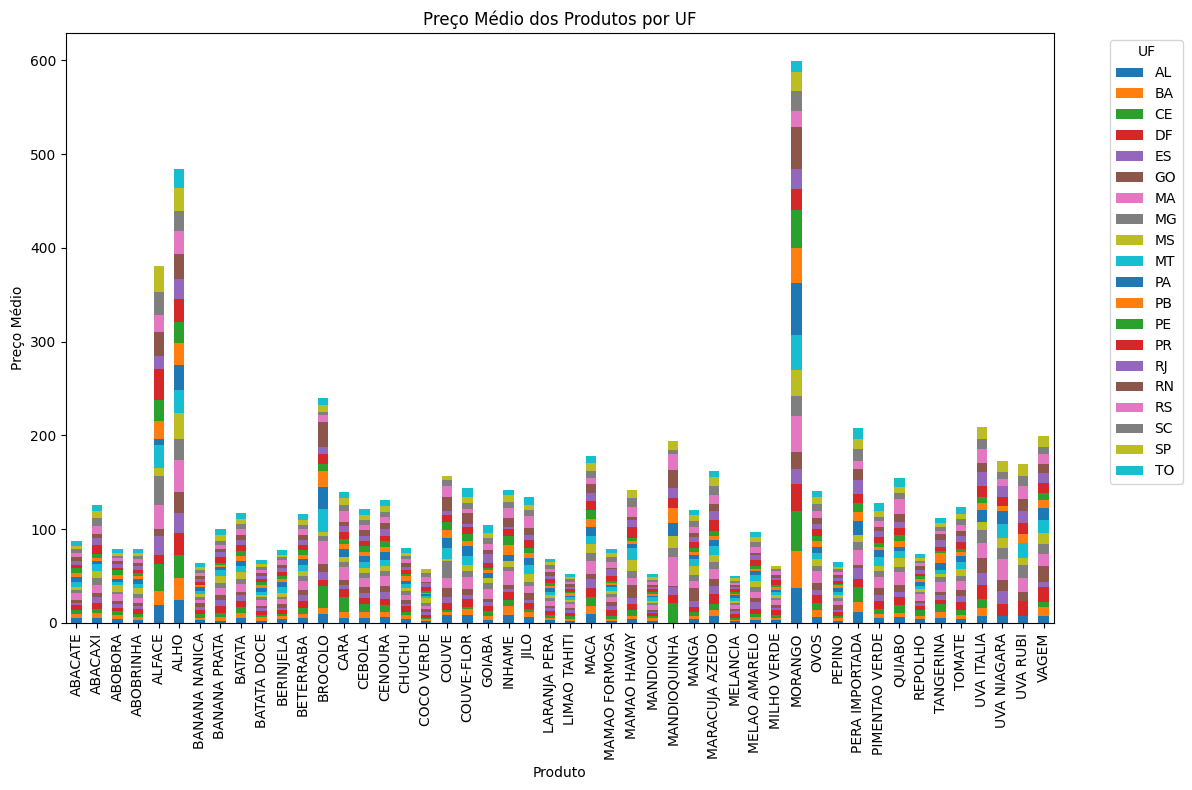

In [0]:
#Criando Gráfico Resposta 1

df_transpo.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Produtos por UF')
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [0]:
# Lista de Produtos com preço médio nulo e suas respectivas UFs
null_values.head(10)

,Produto,UF
MANDIOQUINHA,MANDIOQUINHA,BA
UVA NIAGARA,UVA NIAGARA,BA
UVA RUBI,UVA RUBI,BA
UVA NIAGARA,UVA NIAGARA,CE
UVA RUBI,UVA RUBI,CE
UVA RUBI,UVA RUBI,ES
CARA,CARA,MT
GOIABA,GOIABA,MT
INHAME,INHAME,MT
MANDIOQUINHA,MANDIOQUINHA,MT


##### 2 - Qual o valor médio dos produtos hortifruti mês a mês no ano de 2024

In [0]:

#Consultando Tabela totalizadora_hortigrangeiros e salvando na variavel df_resposta_2 via spark Sql

df_resposta_2 = spark.sql("""SELECT F.Produto,
    D.Unidade,
    F.Ano_Mes,
    F.Preco_Medio_Geral
FROM gold.tables.totalizadora_hortigrangeiros AS F 
LEFT JOIN gold.tables.dimensao_produto AS D ON D.Produto = F.Produto
""")


In [0]:
df_resposta_2.show(10)

+-------+-------+-------+-----------------+
|Produto|Unidade|Ano_Mes|Preco_Medio_Geral|
+-------+-------+-------+-----------------+
|ABACATE|     KG|2024-01|             4.93|
|ABACATE|     KG|2024-02|             4.12|
|ABACATE|     KG|2024-03|             3.96|
|ABACATE|     KG|2024-04|             3.76|
|ABACATE|     KG|2024-05|             3.82|
|ABACATE|     KG|2024-06|             4.23|
|ABACAXI|     UN|2024-01|             6.75|
|ABACAXI|     UN|2024-02|              7.0|
|ABACAXI|     UN|2024-03|             6.76|
|ABACAXI|     UN|2024-04|             6.49|
+-------+-------+-------+-----------------+
only showing top 10 rows



###### RESPOSTA: Como a resposta é uma Tabela com algumas linhas, deixo a tabela abaixo como a resposta.  
Deixo também um gráfico com as informações organizadas em colunas empilhadas, onde conseguimos observar o Preço Médio de cada Produto Mês a Mês.  
Além disso no gráfico conseguimor ver exatamente os produtos que tiveram aumento de preço ao Longo do Tempo e os que tiveram redução.  
Por exemplo a mandioquinha só cresce ao longo dos meses, em jan 24 custava 10,15 o KG e em junho está custando 15,02 o KG.
Já o maracujá azedo reduziu bastante, custava em jan 24 13,11 o KG e está custando 7,29 em jun 24.

In [0]:
from pyspark.sql import SparkSession
import pandas as pd

# Criar uma sessão Spark
spark = SparkSession.builder.appName("StackedBarChart").getOrCreate()

# Converter o resultado para um Pandas DataFrame
df_resposta_2_pandas = df_resposta_2.toPandas()

In [0]:
df_resposta_2_pandas.head(10)

,Produto,Unidade,Ano_Mes,Preco_Medio_Geral
0,ABACATE,KG,2024-01,4.93
1,ABACATE,KG,2024-02,4.12
2,ABACATE,KG,2024-03,3.96
3,ABACATE,KG,2024-04,3.76
4,ABACATE,KG,2024-05,3.82
5,ABACATE,KG,2024-06,4.23
6,ABACAXI,UN,2024-01,6.75
7,ABACAXI,UN,2024-02,7.00
8,ABACAXI,UN,2024-03,6.76
9,ABACAXI,UN,2024-04,6.49


In [0]:
import plotly.express as px
import pandas as pd



# Criar o gráfico de barras interativo
fig = px.bar(df_resposta_2_pandas, x='Produto', y='Preco_Medio_Geral', color='Ano_Mes', barmode='group',
             labels={'Preco_Medio_Geral':'Preço Médio', 'Ano_Mes':'Mês/Ano'},
             title='Evolução Mensal do Preço Médio dos Produtos')

# Mostrar o gráfico
fig.show()

##### 3 - Qual o Estado com os maiores custos de produtos unitários de hortifruti do brasil  

In [0]:
#Consultando Tabela Fato_horigrangeiros e salvando na variavel df_resposta_3 via spark Sql

df_resposta_3 = spark.sql("""SELECT UF,
    count(Produto) as Qtd_produto,
    round(sum(Preco_Medio),2) as total,
    round(total/Qtd_produto,2) as custo_und
FROM gold.tables.fato_hortigrangeiros
GROUP BY
UF

ORDER BY
custo_und DESC
""")

In [0]:
df_resposta_3.show(10)

+---+-----------+---------+---------+
| UF|Qtd_produto|    total|custo_und|
+---+-----------+---------+---------+
| MA|       6096| 69236.81|    11.36|
| MT|       5448| 47698.37|     8.76|
| RN|       2959| 23707.18|     8.01|
| PA|       1818| 14475.21|     7.96|
| CE|       4702| 37327.87|     7.94|
| DF|       5950| 47160.57|     7.93|
| PR|      15867| 123346.4|     7.77|
| RS|       3599| 27848.69|     7.74|
| SP|      29661|210180.17|     7.09|
| MG|       6094| 42816.55|     7.03|
+---+-----------+---------+---------+
only showing top 10 rows



In [0]:
# Converter o resultado para um Pandas DataFrame
df_resposta_3_pandas = df_resposta_3.toPandas()

###### RESPOSTA: O Estado com maiores custos unitários de produtos de Hortifruti é o Estado MA.  
Para essa Analise fiz uma divisão da quantidade de produtos totais pelos custos totais do Estado.  
Deixo um gráfico abaixo com o custo unitário total de cada UF   

In [0]:
import plotly.express as px
import pandas as pd



# Criar o gráfico de barras interativo
fig = px.bar(df_resposta_3_pandas, x='UF', y='custo_und', barmode='group',
             labels={'UF':'UF'},
             title='Evolução Mensal da Variação de Preço Médio dos Produtos')

# Mostrar o gráfico
fig.show()

##### 4 - Qual a variação mês a mês dos produtos de hortifruti no ano de 2024

In [0]:
#Consultando Tabela totalizadora_hortigrangeiros e salvando na variavel df_resposta_4 via spark Sql

df_resposta_4 = spark.sql("""SELECT F.Produto,
    D.Unidade,
    F.Variacao_Mes_Anterior,
    F.Ano_Mes
FROM gold.tables.totalizadora_hortigrangeiros AS F 
LEFT JOIN gold.tables.dimensao_produto AS D ON D.Produto = F.Produto
""")

###### RESPOSTA: Como a resposta é uma Tabela com algumas linhas, deixo a tabela abaixo como a resposta.  
Deixo também um gráfico com as informações organizadas em colunas, onde conseguimos observar a variação do Preço Médio de cada Produto Mês a Mês.  
Além disso no gráfico conseguimor ver exatamente quais os produtos que tiveram a maior variação de Preço ao Longo do Tempo.  
Por exemplo o Mamão Hawai foi o teve a maior variação de um Mês para outro em 2024, uma variação de mais de 50% no mês de abril.

In [0]:
df_resposta_4.show(10)

+-------+-------+---------------------+-------+
|Produto|Unidade|Variacao_Mes_Anterior|Ano_Mes|
+-------+-------+---------------------+-------+
|ABACATE|     KG|                 NULL|2024-01|
|ABACATE|     KG|              -0.1643|2024-02|
|ABACATE|     KG|              -0.0388|2024-03|
|ABACATE|     KG|              -0.0505|2024-04|
|ABACATE|     KG|                0.016|2024-05|
|ABACATE|     KG|               0.1073|2024-06|
|ABACAXI|     UN|                 NULL|2024-01|
|ABACAXI|     UN|                0.037|2024-02|
|ABACAXI|     UN|              -0.0343|2024-03|
|ABACAXI|     UN|              -0.0399|2024-04|
+-------+-------+---------------------+-------+
only showing top 10 rows



In [0]:
from pyspark.sql import SparkSession
import pandas as pd


# Converter o resultado para um Pandas DataFrame
df_resposta_4_pandas = df_resposta_4.toPandas()

In [0]:
import plotly.express as px
import pandas as pd



# Criar o gráfico de barras interativo
fig = px.bar(df_resposta_4_pandas, x='Produto', y='Variacao_Mes_Anterior', color='Ano_Mes', barmode='group',
             labels={'Variacao_Mes_Anterior':'Variacao_Mes_Anterior', 'Ano_Mes':'Mês/Ano'},
             title='Evolução Mensal da Variação de Preço Médio dos Produtos')

# Mostrar o gráfico
fig.show()

##### 5 - Qual Ceasa com o maior Preço médio dos últimos 6 meses da Maça no brasil

In [0]:
#Consultando Tabela totalizadora_hortigrangeiros e salvando na variavel df_resposta_5 via spark Sql

df_resposta_5 = spark.sql("""
SELECT  Fornecedor,
        mean(Preco_Medio) as Media_6_meses
FROM gold.tables.fato_hortigrangeiros
WHERE Produto = 'MACA'
GROUP BY Fornecedor
ORDER BY
Media_6_meses DESC
""")

In [0]:
df_resposta_5.show(10)

+--------------------+------------------+
|          Fornecedor|     Media_6_meses|
+--------------------+------------------+
| CEASA/MA - SAO LUIZ|13.518346456692923|
| CEASA/PR - CASCAVEL|10.053658536585365|
|CEASA/PR - FOZ DO...| 10.03416666666667|
|CEASAMINAS - UBERABA|10.014000000000003|
|CEAGESP - SAO JOS...| 9.946470588235293|
|CEASA/CE - FORTALEZA| 9.588613861386124|
|CEASA/MS - CAMPO ...|             9.585|
| CEASA/DF - BRASILIA|  9.56588709677422|
|CEASAMINAS - BARB...| 9.525882352941176|
|   CEASA/AL - MACEIO| 9.453142857142868|
+--------------------+------------------+
only showing top 10 rows



###### RESPOSTA: O Ceasa com o maior preço médio da Maça nos últimos 6 meses é o CEASA/MA - SAO LUIZ.  
 
Deixo um gráfico abaixo com o custo médio dos últimos 6 meses em cada Ceasa. Nele podemos observar também que o Ceasa com o menor custo é o CEASA/RS - PORTO ALEGRE

In [0]:
from pyspark.sql import SparkSession
import pandas as pd


# Converter o resultado para um Pandas DataFrame
df_resposta_5_pandas = df_resposta_5.toPandas()

In [0]:
import plotly.express as px
import pandas as pd



# Criar o gráfico de barras interativo
fig = px.bar(df_resposta_5_pandas, x='Fornecedor', y='Media_6_meses', barmode='group',
             labels={'Media_6_meses':'Media_6_meses'},
             title='Preço Médio da Maça últimos 6 Meses em cada Ceasa')

# Mostrar o gráfico
fig.show()

##### 6 - Qual o item com maior variação em junho de 2024

In [0]:
#Consultando Tabela totalizadora_hortigrangeiros e salvando na variavel df_resposta_6 via spark Sql

df_resposta_6 = spark.sql("""SELECT Produto,
       Variacao_Mes_Anterior
FROM gold.tables.totalizadora_hortigrangeiros
WHERE Variacao_Mes_Anterior IN (
    SELECT max(Variacao_Mes_Anterior) 
    FROM gold.tables.totalizadora_hortigrangeiros 
    WHERE Ano_Mes = '2024-06'
)
""")

%md
###### RESPOSTA: O Produto com o maior variação em Junho é o Quiabo com a variação de 38,11%.  
 
Deixo abaixo a resposta da consulta efetuada na Tabela totalizadora_hortigrangeiros

In [0]:
df_resposta_6.show()

+-------+---------------------+
|Produto|Variacao_Mes_Anterior|
+-------+---------------------+
| QUIABO|               0.3811|
+-------+---------------------+



## Autoavaliação

Os dados quando extraídos da fonte vieram em um formato onde as datas(Granularidade dia) estavam nas colunas, onde cada coluna representava um dia. Fiz um tratamento 